In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

from collections import Counter
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance



from sklearn.datasets import make_regression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import statistics as st

import random
rm_seed=230
random.seed(rm_seed)
np.random.seed(rm_seed)
plt.rcParams.update({
#     "font.weight": "bold",
    "figure.figsize":"15, 10",
    "font.size":"40",
#     "grid.color": "0.5",
#     "grid.linestyle": "-",
#     "grid.linewidth": 5,
#     "lines.linewidth": 2,
#     "lines.color": "g",
})


from numpy.random import default_rng

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
def rsq(y,yh):
    y_mean=np.mean(y)
    tss=np.sum((y-y_mean)**2)
    rss=np.sum((y-yh)**2)
    return (1-rss/tss)


def rmse(y_sim,y_obs):
    return(np.sqrt(np.mean((y_sim-y_obs)**2)))


def pbias(y_sim,y_obs):
    a=np.sum(y_sim-y_obs)
    b=np.sum(y_obs)
    return (100*a/b)

In [2]:
'''steps: 
1: find the datapoint that appear in every year
2: random split these data in 70% train 30% test
'''
# total 13 variables ,'inst300','etsum',
cd=pd.read_csv('D:/all_GEE/aggregate1920_merged_NORM.csv')# read file
year= np.arange(19,21) 
dat1 = cd[cd.irri!= 0]
dat2=dat1.dropna()
# percentage_variables=['area','sb','sgh','ww','corn','alff']
# dat2[percentage_variables]=dat2[percentage_variables]*900/36000000
# # dat2['inst300']=dat2['inst300']*70*70/36000000
# dat2['etsum']=dat2['etsum']*500*500/36000000

In [3]:
# # plt.scatter(dat2['inst']*70*70/36000000,dat2['etsum']*500*500/36000000)
# fig, ax = plt.subplots(1,1 , dpi=500)
# plt.scatter(dat2['inst200']*70*70/36000000,dat2['alexi']*70*70/36000000, s=1,marker='o',color='blue',alpha=0.5)

# # plt.plot(np.arange(0,10000),np.arange(0,10000),color='b',alpha=0.7)
# ax.set_xlabel('ECOSTRESS ET (mm)')
# ax.set_ylabel('MODIS ET (mm)')
# # plt.text(0, 8000, r'$r^2=0.8, RMSE =630$ (Acre-Feet)')#n_tree=8 minleaf=25
# # plt.text(0, 7000, '30% Test data')#n_tree=8 minleaf=25
# # plt.text(0, 6000, r'$r^2=0.7, RMSE =781$ (Arce_Feet)')
# fig.tight_layout() 
# # ax.set_xlim(0, 10000)
# # ax.set_ylim(0,10000)
# ax.yaxis.set_ticks_position('both')
# ax.xaxis.set_ticks_position('both')
# ax.tick_params(direction='in')
# # plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.5)
# # ax.axis('square')
# # plt.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/ecostress_ite200_uncertainty_inst_VS_modis.pdf',bbox_inches='tight',dpi=500)
# # plt.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/ecostress_ite200_uncertainty_inst_VS_modis.png',bbox_inches='tight',dpi=500)

# 1 random split data prepare & TEST

In [4]:
# lb=dat2['label'].to_numpy()
# label = Counter(lb) # counter each lable appearance 
# # print(label)
# duplicate_list = list([item for item in label if label[item]>len(year)-1]) # keep lable that  appear every year (total 12 years, large than 11 times)
# unique_list=list([item for item in label if label[item]<len(year)])# filter lable that not appear every year ( less than 12 times)
# mask_dup=np.in1d(lb,duplicate_list) # mask the dupicate lable 
# mask_unique=np.in1d(lb,unique_list)# mask the unique lable
# dat_dup=dat2[mask_dup]
# dat_uni=dat2[mask_unique]
# print(dat_dup.shape)
# print(dat2.shape)
# print(dat_uni.shape)

In [5]:
# appended_data_tr = []
# appended_data_te = []
# i_label_rnd_tr=random.sample(range(0, len(duplicate_list )), math.floor(0.7*len(duplicate_list ))) # random split duplicate label in 70%
# i_label_rnd_te= [x for x in range(len(duplicate_list )) if x not in i_label_rnd_tr] # the rest 30 % is test 
# print(len(i_label_rnd_tr))
# print(len(i_label_rnd_te))
# for i in range (len(year)): # loop over each year and aggreaget the same 70% to train, 30% to test
#     dat_sy=dat_dup[(dat_dup.year== year[i])]
#     dat_tr=dat_sy.iloc[i_label_rnd_tr, :]
#     dat_te= dat_sy.iloc[i_label_rnd_te, :]
#     appended_data_tr.append(dat_tr)
#     appended_data_te.append(dat_te)
# appended_data_tr = pd.concat(appended_data_tr)   
# appended_data_te = pd.concat(appended_data_te) 
# print(appended_data_tr.shape)
# print(appended_data_te.shape)
# appended_data_te.to_excel('C:/Users/swei46.ASURITE/Desktop/GEE6km6-17/appended_te.xlsx')
# appended_data_tr.to_excel('C:/Users/swei46.ASURITE/Desktop/GEE6km6-17/appended_tr.xlsx')

In [6]:
# '"random split yy plot"'
# variables=['denies_area','sb','sgh','ww','corn','alff','vpd','tem','alexi','pr','gimerged','ndvimerged','ndwimerged'] 
# dat_te=appended_data_te
# dat_tr=appended_data_tr
# X_train=dat_tr[variables].to_numpy()
# y_train =np.ravel(dat_tr[['irri']]. to_numpy())
# X_test=dat_te[variables].to_numpy()
# y_test =np.ravel(dat_te[['irri']]. to_numpy())
# print(X_test.shape)
# print(X_train.shape)
# rfm3=RandomForestRegressor(n_jobs=-1,n_estimators= 800,random_state=99,max_features=8,min_samples_leaf=20)
# rfm3.fit(X_train,y_train) # fit on train
# ## predict on val
# yhte= rfm3.predict(X_test)
# yhtr=rfm3.predict(X_train)
# print(rmse(y_test,yhte))
# print(rsq(y_test,yhte))
# print(rmse(y_train,yhtr))
# print(rsq(y_train,yhtr))
# print(pbias(y_test,yhte))

In [3]:
"'experiment c'"
variables=['denies_area','sb','sgh','ww','corn','alff','vpd','tem','etsum','pr','gimerged','ndvimerged','ndwimerged'] #etsum, alexi,inst300
n_epoch=200
y_sum=np.zeros((n_epoch,2))
rsq_t=np.zeros ((n_epoch,2))
rmse_t=np.zeros ((n_epoch,2))
vari_imp_mn=np.zeros((n_epoch,len(variables)))
pbias_t=np.full((n_epoch,1),np.nan)
for u in range(n_epoch):
    lb=dat2['label'].to_numpy()
    label = Counter(lb) # counter each lable appearance 
    # print(label)
    duplicate_list = list([item for item in label if label[item]>len(year)-1]) # keep lable that  appear every year (total 12 years, large than 11 times)
    unique_list=list([item for item in label if label[item]<len(year)])# filter lable that not appear every year ( less than 12 times)
    mask_dup=np.in1d(lb,duplicate_list) # mask the dupicate lable 
    mask_unique=np.in1d(lb,unique_list)# mask the unique lable
    dat_dup=dat2[mask_dup]
    dat_uni=dat2[mask_unique]
    appended_data_tr = []
    appended_data_te = []
    i_label_rnd_tr=random.sample(range(0, len(duplicate_list )), math.floor(0.7*len(duplicate_list ))) # random split duplicate label in 70%
    i_label_rnd_te= [x for x in range(len(duplicate_list )) if x not in i_label_rnd_tr] # the rest 30 % is test 
    for i in range (len(year)): # loop over each year and aggreaget the same 70% to train, 30% to test
        dat_sy=dat_dup[(dat_dup.year== year[i])]
        dat_tr=dat_sy.iloc[i_label_rnd_tr, :]
        dat_te= dat_sy.iloc[i_label_rnd_te, :]
        appended_data_tr.append(dat_tr)
        appended_data_te.append(dat_te)
    appended_data_tr = pd.concat(appended_data_tr)   
    appended_data_te = pd.concat(appended_data_te) 
    dat_te=appended_data_te#[(appended_data_te.label>2568)]
    dat_tr=appended_data_tr#[(appended_data_tr.label<2568) ]
    X_train=dat_tr[variables].to_numpy()
    y_train =np.ravel(dat_tr[['irri']]. to_numpy())
    X_test=dat_te[variables].to_numpy()
    y_test =np.ravel(dat_te[['irri']]. to_numpy())
    rfm3=RandomForestRegressor(n_jobs=-1,n_estimators= 800,random_state=rm_seed,max_features=8,min_samples_leaf=20)
    rfm3.fit(X_train,y_train)
    yhte= rfm3.predict(X_test)
    yhtr=rfm3.predict(X_train)
    y_sum[u,0]=np.sum(yhte)
    y_sum[u,1]=np.sum(y_test)
    rsq_t[u,0]=rsq(y_test,yhte)
    rsq_t[u,1]=rsq(y_train,yhtr)
    rmse_t[u,0]=rmse(y_test,yhte)
    rmse_t[u,1]=rmse(y_train,yhtr)
    pbias_t[u]=pbias(yhte,y_test)
    vari_imp_mn[u,:]=rfm3.feature_importances_

In [8]:
# a=(yhte-y_test).sum()
# b=y_test.sum()
# 100*a/b
# plt.hist(rsq_t[:,0])
# yhte,y_test

In [9]:
np.mean(rmse_t[:,0]),np.std(rmse_t[:,0])

(642.3654277454625, 26.686010312772588)

In [10]:
np.mean(pbias_t),np.std(pbias_t)

(-0.13144586031638475, 2.023970229709634)

In [11]:
np.mean(rsq_t[:,0]),np.std(rsq_t[:,0])

(0.7949081876848035, 0.013062267505912451)

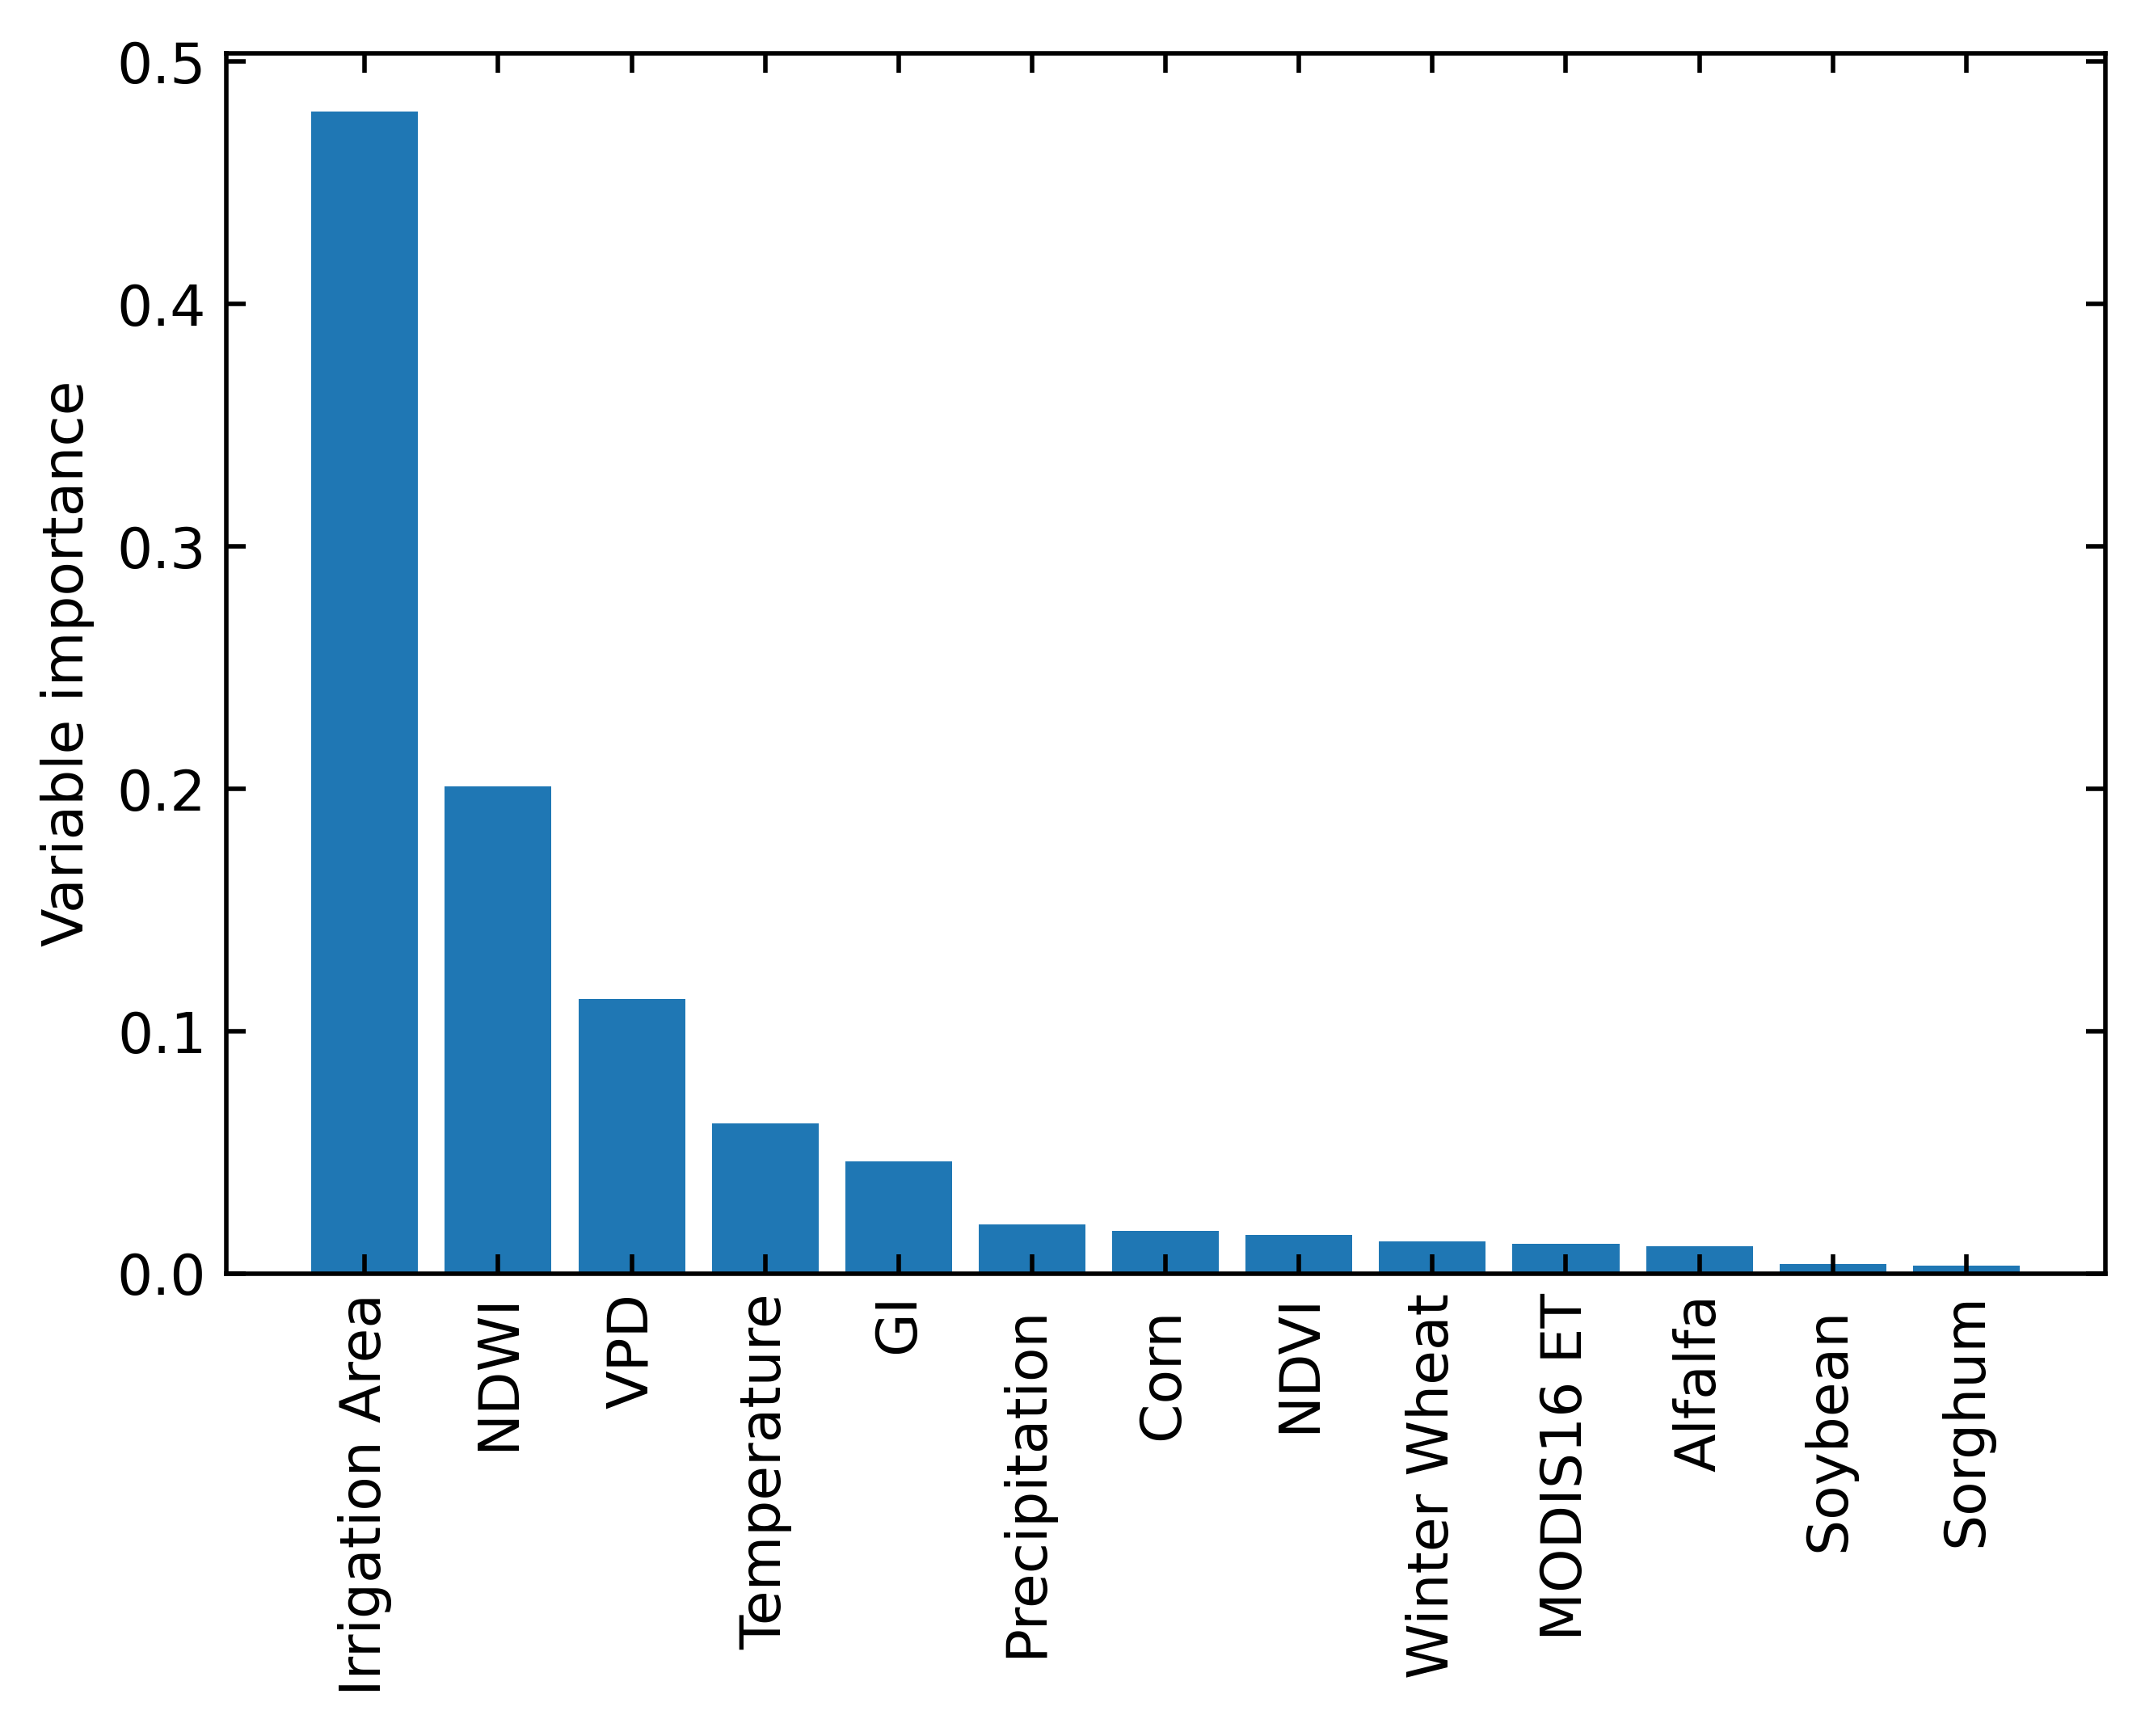

variable0     Irrigation Area
12               NDWI
6                 VPD
7         Temperature
10                 GI
9      Precipitation 
4               Corn 
11               NDVI
3        Winter Wheat
8          MODIS16 ET
5             Alfalfa
1            Soybean 
2             Sorghum
Name: variable, dtype: object, group0     0.479537
12    0.201116
6     0.113340
7     0.061993
10    0.046294
9     0.020360
4     0.017667
11    0.016047
3     0.013387
8     0.012098
5     0.011090
1     0.003883
2     0.003187
Name: group, dtype: float64


In [4]:
plot_vari_imp=np. average(vari_imp_mn, axis=0)
variables_name=['Irrigation Area',"Soybean ","Sorghum","Winter Wheat","Corn ","Alfalfa","VPD","Temperature","MODIS16 ET","Precipitation ","GI","NDVI","NDWI"] #ECOSTRESS PT-JPL ET,ECOSTRESS dis-ALEXI ET,MODIS16 ET
variables=['denies_area','sb','sgh','ww','corn','alff','vpd','tem','et','pr','gimerged','ndvimerged','ndwimerged'] 
varplot=pd.DataFrame({'group':plot_vari_imp, 'variable':variables_name})
dfx = varplot.sort_values('group',ascending=False)
fig, ax = plt.subplots(1,1 , dpi=500)

plt.bar(dfx['variable'],dfx['group'])
# ax.set_xlabel('variables name',fontsize=25)
ax.set_ylabel('Variable importance')
ax.xaxis.set_ticks_position('both')
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
plt.xticks(rotation=90)
plt.yticks()
# plt.title('variable importance',fontsize=25)

# fig.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/figure_fin_v/figure6_c_modis_1920_random_sp_varimp.pdf',bbox_inches='tight',dpi=500)
# fig.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/figure_fin_v/figure6_c_modis_1920_random_sp_varimp.png',bbox_inches='tight',dpi=500)
# fig.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/figure_fin_v/figure6_c_modis_1920_random_sp_varimp.tif',bbox_inches='tight',dpi=500)
plt.show()
print('variable{}, group{}'.format(dfx['variable'],dfx['group']))

In [16]:
dfx.to_csv('D:/mansucript_fig_results_data_file/EXc_figure7c_modis_varimp.csv')

# temporal test

In [13]:
# '"regional yy plot"'
# dat_te=dat2[(dat2.year==19)]
# dat_tr=dat2[(dat2.year==20)]
# X_train=dat_tr[variables].to_numpy()
# y_train =np.ravel(dat_tr[['irri']]. to_numpy())
# X_test=dat_te[variables].to_numpy()
# y_test =np.ravel(dat_te[['irri']]. to_numpy())
# rfm = RandomForestRegressor(n_jobs=-1,n_estimators=800,random_state=0,max_features=13,min_samples_leaf=20)
# rfm.fit(X_train,y_train)
# yhte= rfm.predict(X_test)
# yhtr=rfm.predict(X_train)
# print(rmse(y_test,yhte))
# print(rsq(y_test,yhte))
# print(rmse(y_train,yhtr))
# print(rsq(y_train,yhtr))

#  regional Split and test

In [14]:
# '"regional yy plot"'
# dat_te=dat2[(dat2.label>2668)]
# dat_tr=dat2[(dat2.label<2668)]
# X_train=dat_tr[variables].to_numpy()
# y_train =np.ravel(dat_tr[['irri']]. to_numpy())
# X_test=dat_te[variables].to_numpy()
# y_test =np.ravel(dat_te[['irri']]. to_numpy())
# rfm = RandomForestRegressor(n_jobs=-1,n_estimators=800,random_state=0,max_features=6,min_samples_leaf=500)
# rfm.fit(X_train,y_train)
# yhte= rfm.predict(X_test)
# yhtr=rfm.predict(X_train)
# print(rmse(y_test,yhte))
# print(rsq(y_test,yhte))
# print(rmse(y_train,yhtr))
# print(rsq(y_train,yhtr))

In [15]:
# fig, ax = plt.subplots(1,1 , dpi=500)
# plt.scatter(y_test,yhte, s=1,marker='o',color='grey',alpha=0.5)
# plt.scatter(y_test,y_test,s=0.5,marker='o',color='b',alpha=0.2)
# ax.set_xlabel('Insitu Irrigation  (Acre-Feet/grid)')
# ax.set_ylabel('RF Predicted Irrigation (Acre-Feet/grid)')
# plt.text(0, 6000, r'$r^2=0.84, RMSE =675$ (Acre-Feet)')#n_tree=8 minleaf=25
# plt.text(0, 7000, '30% Test data')#n_tree=8 minleaf=25
# # plt.text(0, 6000, r'$r^2=0.7, RMSE =781$ (Arce_Feet)')
# fig.tight_layout() 
# ax.set_xlim(0, 10000)
# ax.set_ylim(0, 10000)
# ax.yaxis.set_ticks_position('both')
# ax.xaxis.set_ticks_position('both')
# ax.tick_params(direction='in')
# # plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.5)
# ax.axis('square')
# # plt.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/agu_ppt/random_sp_yyplot.pdf',bbox_inches='tight',dpi=500)

# pdp

In [16]:
# '" pdp"'
# variables_name=['Irrigation Area',"Soybean (%)","Sorghum (%)","Winter Wheat (%)","Corn (%)","Alfalfa (%)","VPD","Temperature (celsius)",'precipitation (mm)','ECOSTRESS sum ET (mm)',"NDVI","GI","NDWI"] 


# fig, axes = plt.subplots(nrows=5, ncols=3,figsize=(12, 10),dpi=500,sharey=True)
# axes = axes.flatten()
# for v in range(len(variables)):
#     axes[v]=PartialDependenceDisplay.from_estimator(rfm3, X_train, features=[v], feature_names=variables_name,ax=axes[v])
# fig.tight_layout() 
# axes[13].set_axis_off()
# # axes[12].set_axis_off()
# axes[14].set_axis_off()
# plt.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/pdp_1920_ecostress_reducesum.pdf',bbox_inches='tight',dpi=500)
# plt.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/pdp_1920_ecostress_reducesum.png',bbox_inches='tight',dpi=500)

# varimport

In [17]:
# variables_name=['MODIS ET','Irrigation Area','Soybean' ,'Sorghum','Winter Wheat','Corn','Alfalfa','VPD','Precipitation','Temperature','NDVI','GI','NDWI'] 

# perm_importance = permutation_importance(rfm3, X_test, y_test)
# print(type(perm_importance))
# sorted_idx = perm_importance.importances_mean.argsort()
# print(type(perm_importance.importances_mean))
# varplot=pd.DataFrame({'group':perm_importance.importances_mean, 'variable':variables_name})
# dfx = varplot.sort_values('group',ascending=False)
# fig, ax = plt.subplots(1,1 , dpi=500,figsize=(15,10))

# plt.bar(dfx['variable'],dfx['group'])
# # ax.set_xlabel('variables name',fontsize=25)
# ax.set_ylabel('Variable importance',fontsize=25)
# ax.xaxis.set_ticks_position('both')
# ax.tick_params(direction='in')
# ax.yaxis.set_ticks_position('both')
# plt.xticks(fontsize=25,rotation=90)
# plt.title('Permutation Based Feature Importance ',fontsize=25)
# plt.yticks(fontsize=25)
# plt.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/random _spatial__Permutation_Based_varimp_modis.png',bbox_inches='tight',dpi=500)
# plt.savefig('C:/Users/swei46.ASURITE/OneDrive/Documents/weekly_repo/manuscript/manuscript_fig/random _spatial__Permutation_Based_varimp_modis.pdf',bbox_inches='tight',dpi=500)